In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('LoanData.csv')

In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Explore categorical variables 
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001119,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Data Cleaning

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Treat missing data in categorical variables
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Treat missing data in numerical variables 
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

Text(0.5, 0.98, 'Checking for Outliers')

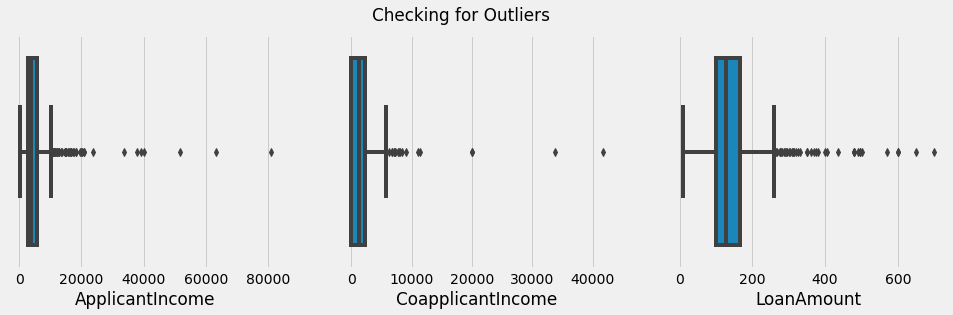

In [12]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Checking for Outliers')

In [13]:
(data['ApplicantIncome'] > 25000).sum() / 614

0.011400651465798045

In [14]:
(data['CoapplicantIncome'] > 20000).sum() / 614

0.003257328990228013

In [15]:
(data['LoanAmount'] > 450).sum() / 614

0.019543973941368076

Remove outliers, since the percentage of outliers in these three variables are low. 

In [16]:
data = data[data['ApplicantIncome'] < 250000]

In [17]:
data = data[data['CoapplicantIncome'] < 20000]

In [18]:
data = data[data['LoanAmount'] < 450]

### Univariate Analysis

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 0.98, 'Distribution of Applicant Income, Coapplicant Income and Loan Amount')

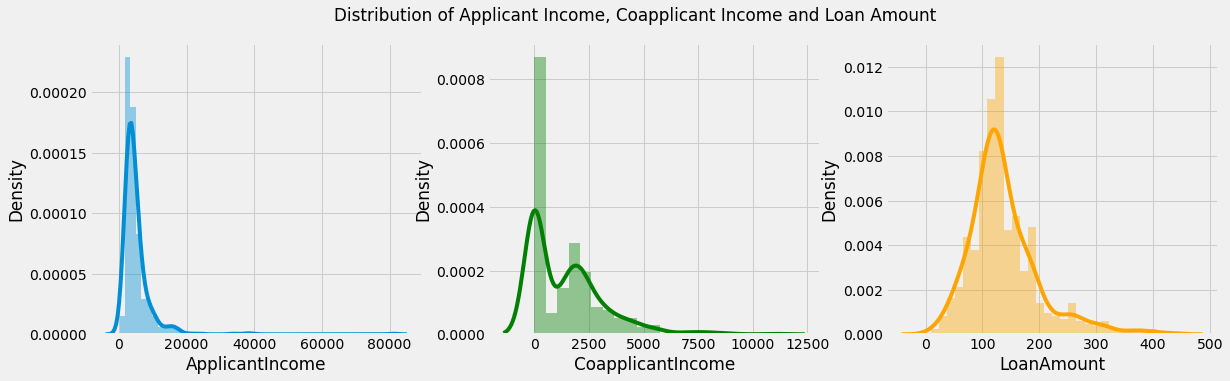

In [19]:
# Numerical variables
plt.rcParams['figure.figsize'] = (18,5)
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color = 'orange')

plt.suptitle('Distribution of Applicant Income, Coapplicant Income and Loan Amount')

Applicant income and coapplicant income are skewed. 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

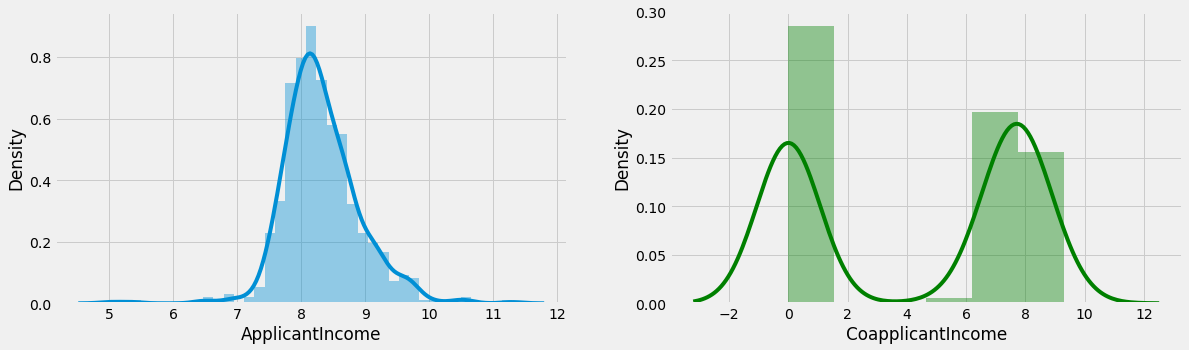

In [20]:
import warnings 
warnings.filterwarnings('ignore')

data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])
#data['LoanAmount'] = np.log(data['LoanAmount'])

plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'], color = 'green')


Text(0.5, 0.98, 'Distribution of Numerical Variables')

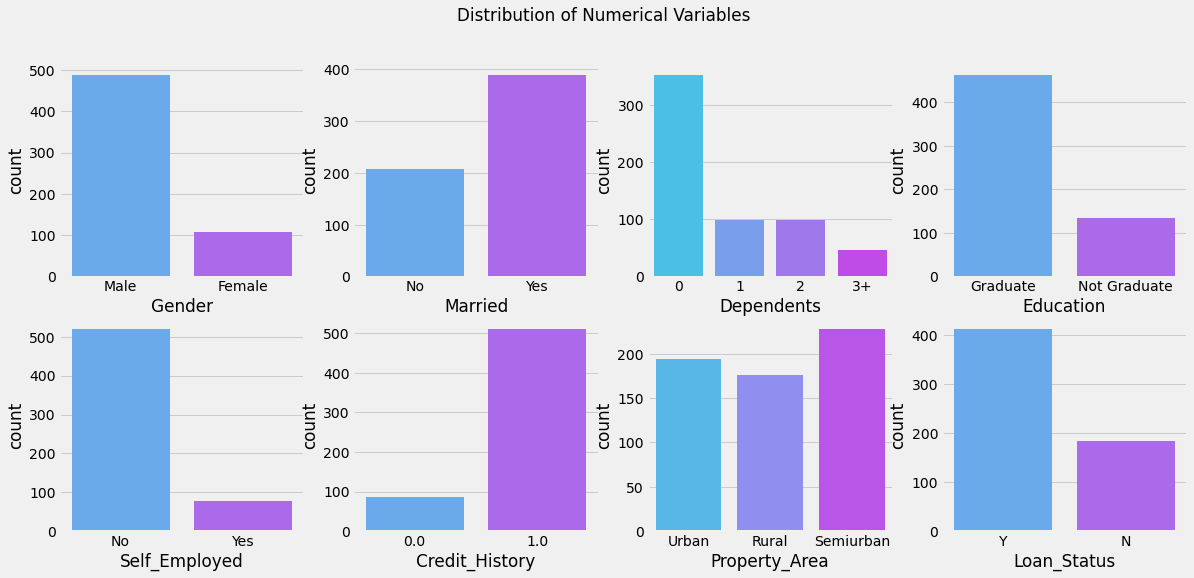

In [21]:
# Categorical variables 
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,4,1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2,4,2)
sns.countplot(data['Married'], palette = 'cool')

plt.subplot(2,4,3)
sns.countplot(data['Dependents'], palette = 'cool')

plt.subplot(2,4,4)
sns.countplot(data['Education'], palette = 'cool')

plt.subplot(2,4,5)
sns.countplot(data['Self_Employed'], palette = 'cool')

plt.subplot(2,4,6)
sns.countplot(data['Credit_History'], palette = 'cool')

plt.subplot(2,4,7)
sns.countplot(data['Property_Area'], palette = 'cool')

plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'], palette = 'cool')

plt.suptitle('Distribution of Numerical Variables')

### Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

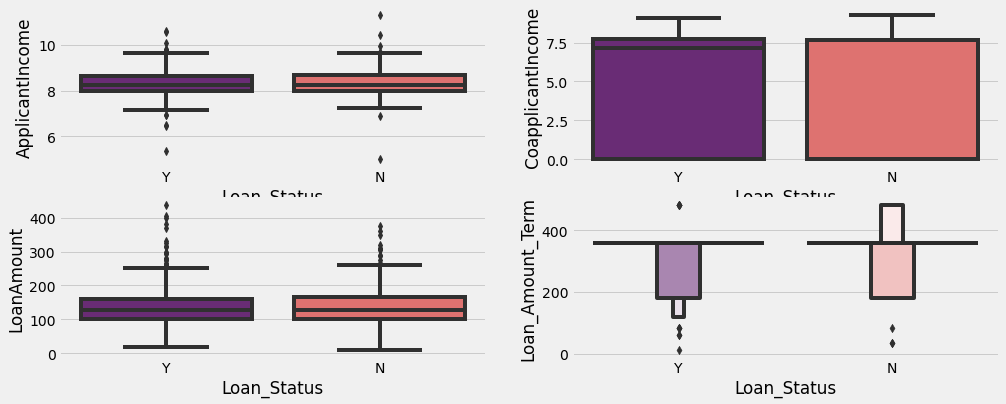

In [22]:
# Income on loan status
plt.rcParams['figure.figsize'] = (15,6)

plt.subplot(2,2,1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = 'magma')

plt.subplot(2,2,2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette = 'magma')

plt.subplot(2,2,3)
sns.boxplot(data['Loan_Status'], data['LoanAmount'], palette = 'magma')

plt.subplot(2,2,4)
sns.boxenplot(data['Loan_Status'], data['Loan_Amount_Term'], palette = 'magma')

#plt.suptitle('Relationship Between Income and Loan Status\n', fontsize = 18)

In [23]:
print("Loan Status vs Marriage")
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print("Loan Status vs Dependents")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Loan Status vs Education")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print("Loan Status vs Being Self Employed")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Loan Status vs Property Area")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Loan Status vs Marriage
Married       No  Yes
Loan_Status          
N             76  109
Y            132  281


Loan Status vs Dependents
Dependents     0   1   2  3+
Loan_Status                 
N            110  35  24  16
Y            243  64  75  31


Loan Status vs Education
Education    Graduate  Not Graduate
Loan_Status                        
N                 133            52
Y                 331            82


Loan Status vs Being Self Employed
Self_Employed   No  Yes
Loan_Status            
N              160   25
Y              360   53


Loan Status vs Property Area
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 67         53     65
Y                109        175    129


## Data Prep

In [24]:
data = data.drop(['Loan_ID'], axis = 1)

In [25]:
#Gender	Married	Dependents	Education	Self_Employed	Property_Area	Loan_Status
# Encode categorical variables
data['Gender'] = data['Gender'].replace(('Male', 'Female'), (0, 1))
data['Married'] = data['Married'].replace(('Yes', 'No'), (1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'), (1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('No', 'Yes'), (0,1))
data['Property_Area'] = data['Property_Area'].replace(('Rural', 'Semiurban', 'Urban'), (0,1,1))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'), (1,0))

In [26]:
# Separate the target variable 
y = data['Loan_Status']
X = data.drop(['Loan_Status'], axis = 1)

In [27]:
# Performing over-sampling 

from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler(random_state = 0)
ros.fit(X,y)

X_resampled, y_resampled = ros.fit_resample(X,y)



In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 24)

In [29]:
# Logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

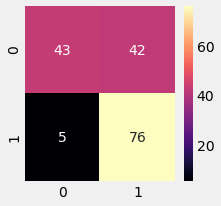

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        85
           1       0.64      0.94      0.76        81

    accuracy                           0.72       166
   macro avg       0.77      0.72      0.71       166
weighted avg       0.77      0.72      0.70       166



In [30]:
from sklearn.metrics import confusion_matrix, classification_report 

cm = confusion_matrix(y_test, y_pred_log_reg)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'magma', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_log_reg)
print(cr)

In [31]:
# Gradient boosting model 

from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

y_pred_grad_boost = grad_boost.predict(X_test)

print('Training accuracy:', grad_boost.score(X_train, y_train))
print('Testing accuracy:', grad_boost.score(X_test, y_test))

Training accuracy: 0.9015151515151515
Testing accuracy: 0.7891566265060241


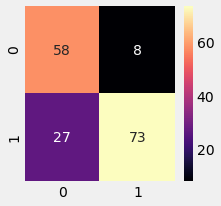

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        85
           1       0.73      0.90      0.81        81

    accuracy                           0.79       166
   macro avg       0.80      0.79      0.79       166
weighted avg       0.81      0.79      0.79       166



In [32]:
cm = confusion_matrix(y_pred_grad_boost, y_test)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'magma', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_grad_boost)
print(cr)

In [33]:
from sklearn.model_selection import cross_val_score 

clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, X_train, y_train, cv = 10)
print(scores)

[0.83333333 0.75757576 0.84848485 0.78787879 0.77272727 0.86363636
 0.75757576 0.75757576 0.78787879 0.75757576]


In [36]:
scores.mean()

0.7924242424242425

hiiiii